In [1]:
import numpy             as np
import pandas            as pd
import geopandas         as gpd
import seaborn           as sns
import matplotlib.pyplot as plt
from shapely import geometry
import folium

In [2]:
path_shape_data_final = "../geo_data/final/clima_australia.shp"
path_csv_data_final = "../csv_data/clima_australia.csv"

In [3]:
gdf = gpd.read_file(path_shape_data_final)

In [5]:
gdf.crs = "EPSG:4326"

In [8]:
gdf.head(2)

id       lon      lat  meanjan  meanfeb  meanmar  meanapr  meanmay  \
0   0  113.0625 -25.6875   26.245     27.6    26.24    23.07     19.7   
1   1  113.0625 -25.5625   26.335     27.6    26.24    23.07     19.7   

   meanjun  meanjul  ...  rainapr  rainmay  rainjun  rainjul  rainaug  \
0    17.21   15.865  ...    15.42    37.66    59.27    46.41    28.42   
1    17.21   15.865  ...    16.15    36.90    58.51    46.56    27.46   

   rainsep  rainoct  rainnov  raindec  \
0    11.18     5.99     4.01     6.18   
1    11.06     6.33     4.60     8.08   

                                            geometry  
0  POLYGON ((113.00000 -25.75000, 113.00000 -25.6...  
1  POLYGON ((113.00000 -25.62500, 113.00000 -25.5...  

[2 rows x 149 columns]

In [128]:
def agrupar_valores(serie,nbins):
    scut = pd.cut(serie, bins=np.linspace(serie.min(), serie.max(), nbins))
    return scut

def gen_geo_map_plot(df,name_serie,nbins):
    from shapely.ops import cascaded_union
    
    scut   = agrupar_valores(df[name_serie],nbins)
    dfgen  = gpd.GeoDataFrame(scut, geometry = gdf.geometry)
    geomss = []
    values = []

    for interval in dfgen[name_serie].unique():
        try:
            val = interval.mid
        except:
            continue
        geolist = (dfgen[dfgen[name_serie]== interval].geometry).tolist()
        geoms = gpd.GeoSeries(cascaded_union(geolist))
        #print(type(geoms[0]))
        values.append(val)
        geomss.append(geoms[0])
        
    result = gpd.GeoDataFrame({name_serie:values},geometry=geomss)
    result.crs = "EPSG:4326"
    return result

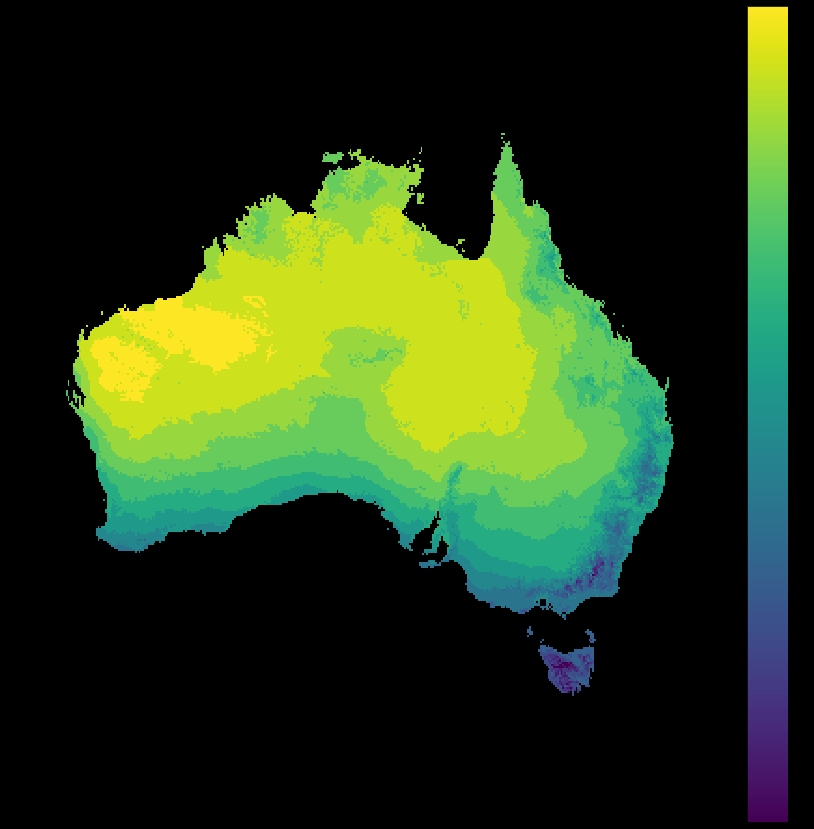

In [139]:
test = gen_geo_map_plot(gdf,'meanjan',15)

fig,ax = plt.subplots(figsize=(15,15),facecolor='black')
test.plot(column='meanjan',legend=True,ax=ax)
ax.set_facecolor('black')

In [161]:
def plot_year_data(gdf,dato_string,divisiones,cmap='viridis'):
    meses = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    fig,axes = plt.subplots(ncols=4,nrows=3,figsize=(20,14),facecolor='#4D4D4D',constrained_layout=True)
    for i, ax in enumerate(axes.flat):
        dato = dato_string+meses[i]
        gen_geo_map_plot(gdf,dato,divisiones).plot(column=dato,ax=ax,
                                                   vmin=0,vmax=14,
                                                   #legend=True,
                                                   cmap=cmap
                                                  )
        ax.set_title(meses[i])
        ax.set_facecolor('#4D4D4D')

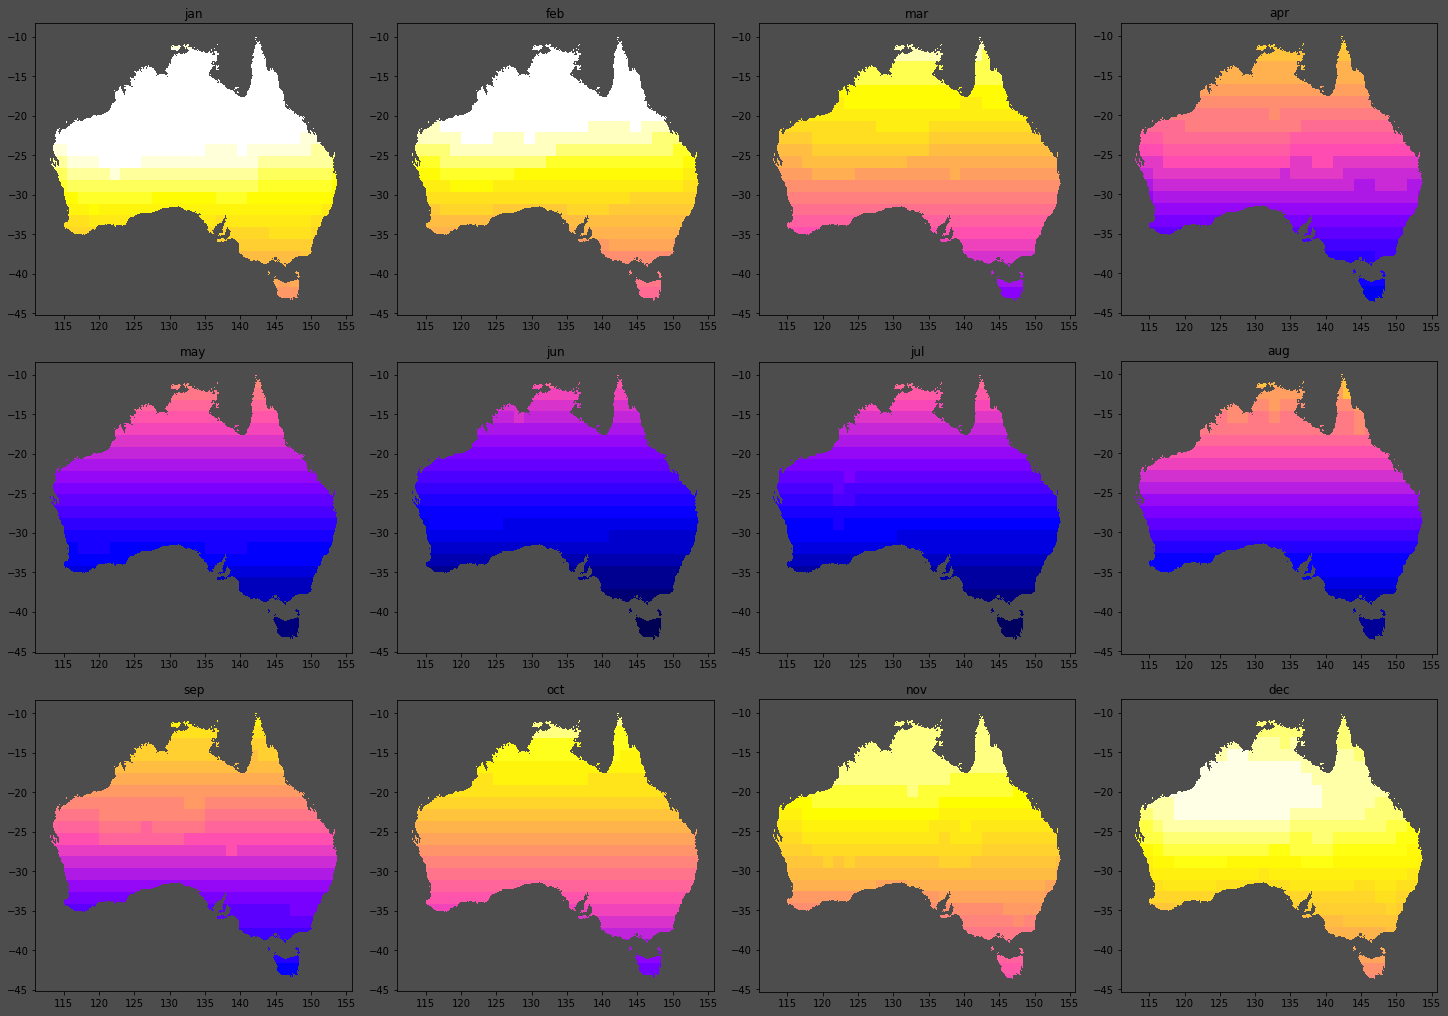

In [162]:
plot_year_data(gdf,'uv',20,cmap='gnuplot2')

In [155]:
gdf.columns.tolist()

['id',
 'lon',
 'lat',
 'meanjan',
 'meanfeb',
 'meanmar',
 'meanapr',
 'meanmay',
 'meanjun',
 'meanjul',
 'meanaug',
 'meansep',
 'meanoct',
 'meannov',
 'meandec',
 'maxjan',
 'maxfeb',
 'maxmar',
 'maxapr',
 'maxmay',
 'maxjun',
 'maxjul',
 'maxaug',
 'maxsep',
 'maxoct',
 'maxnov',
 'maxdec',
 'minjan',
 'minfeb',
 'minmar',
 'minapr',
 'minmay',
 'minjun',
 'minjul',
 'minaug',
 'minsep',
 'minoct',
 'minnov',
 'mindec',
 'frostann',
 'rndiasjan',
 'rndiasfeb',
 'rndiasmar',
 'rndiasapr',
 'rndiasmay',
 'rndiasjun',
 'rndiasjul',
 'rndiasaug',
 'rndiassep',
 'rndiasoct',
 'rndiasnov',
 'rndiasdec',
 'sunjan',
 'sunfeb',
 'sunmar',
 'sunapr',
 'sunmay',
 'sunjun',
 'sunjul',
 'sunaug',
 'sunsep',
 'sunoct',
 'sunnov',
 'sundec',
 'evapjan',
 'evapfeb',
 'evapmar',
 'evapapr',
 'evapmay',
 'evapjun',
 'evapjul',
 'evapaug',
 'evapsep',
 'evapoct',
 'evapnov',
 'evapdec',
 'etaajan',
 'etaafeb',
 'etaamar',
 'etaaapr',
 'etaamay',
 'etaajun',
 'etaajul',
 'etaaaug',
 'etaasep',
 'et

# PCA

In [61]:
df_st = (
    gdf
    .set_index('id')
    .drop(columns=['geometry'])
)
df_st.describe()

lon           lat       meanjan       meanfeb       meanmar  \
count  44854.000000  44854.000000  44854.000000  44854.000000  44854.000000   
mean     134.556352    -25.665704     27.790840     27.274018     25.409779   
std       10.350440      6.240970      3.725653      3.394658      3.641405   
min      113.062500    -43.562500      8.795000      9.105000      7.515000   
25%      126.062500    -30.312500     25.955000     25.645000     23.355000   
50%      135.187500    -25.812500     28.750000     28.210000     26.215000   
75%      143.437500    -21.062500     30.635000     29.795000     28.215000   
max      153.687500    -10.062500     33.555000     32.595000     32.155000   

            meanapr       meanmay       meanjun       meanjul       meanaug  \
count  44854.000000  44854.000000  44854.000000  44854.000000  44854.000000   
mean      21.910564     17.885338     14.784800     13.953240     15.719811   
std        3.974106      4.161466      4.135817      4.219975      4.490281   
min        4.290000      0.890000     -2.025000     -3.910000     -3.085000   
25%       19.365000     15.155000     12.155000     11.295000     12.720000   
50%       22.050000     17.230000     13.810000     12.870000     14.825000   
75%       25.225000     20.925000     17.575000     16.815000     19.035000   
max       29.990000     28.100000     26.265000     25.655000     26.220000   

       ...       rainmar       rainapr       rainmay       rainjun  \
count  ...  44854.000000  44854.000000  44854.000000  44854.000000   
mean   ...     57.769253     30.359224     26.250008     24.182474   
std    ...     57.720173     28.728158     23.740628     25.433628   
min    ...      7.090000      2.880000      1.820000      0.170000   
25%    ...     25.280000     15.400000     12.480000      9.670000   
50%    ...     37.190000     21.690000     18.610000     16.080000   
75%    ...     63.985000     35.767500     33.460000     29.540000   
max    ...    730.120000    569.090000    349.840000    302.150000   

            rainjul       rainaug       rainsep       rainoct       rainnov  \
count  44854.000000  44854.000000  44854.000000  44854.000000  44854.000000   
mean      23.537651     18.625086     17.486362     24.047392     37.303134   
std       27.648136     27.825063     24.034704     22.055051     27.059557   
min        0.530000      0.060000      0.260000      0.250000      0.360000   
25%        8.850000      3.480000      4.690000     11.860000     17.450000   
50%       14.045000      8.400000      8.640000     17.620000     28.650000   
75%       29.087500     23.800000     22.140000     28.170000     52.137500   
max      321.830000    355.330000    345.140000    319.290000    248.230000   

            raindec  
count  44854.000000  
mean      61.105785  
std       50.543089  
min        3.130000  
25%       25.380000  
50%       44.695000  
75%       78.527500  
max      338.660000  

[8 rows x 147 columns]

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(df_st)
scaled_df = pd.DataFrame(scaled_array,columns=df_st.columns,index=df_st.index)

<AxesSubplot:>

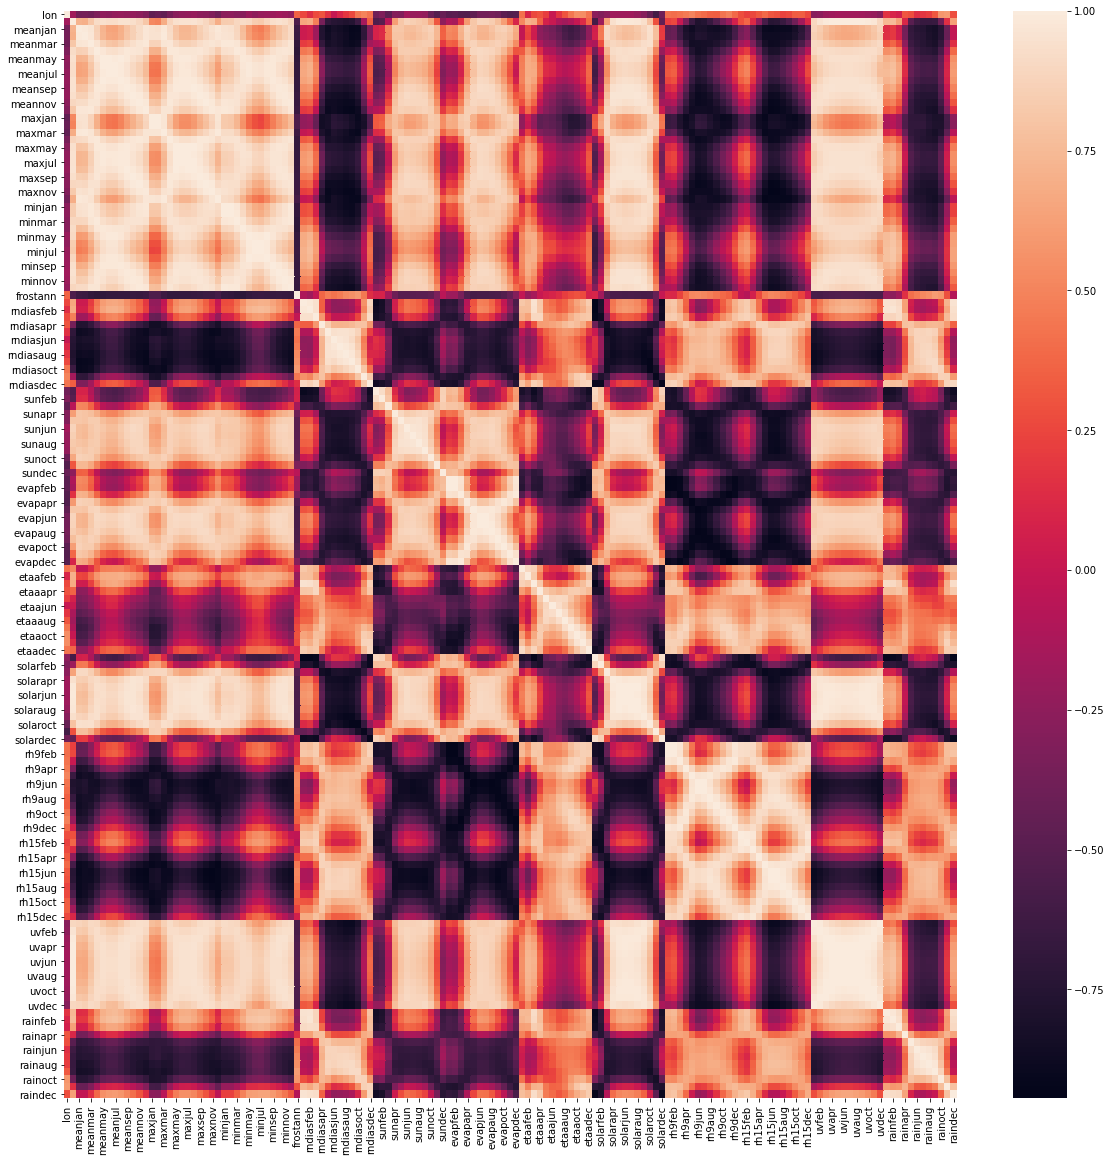

In [66]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(scaled_df.corr(),ax=ax)

In [67]:
from sklearn.decomposition import PCA

pca_object = PCA()
pca_object.fit(scaled_df)

transformed_array = pca_object.transform(scaled_df)

df_transformed = pd.DataFrame(data=transformed_array,index=scaled_df.index,columns=['PC{}'.format(i) for i in range(1,pca_object.n_components_+1)])

<AxesSubplot:>

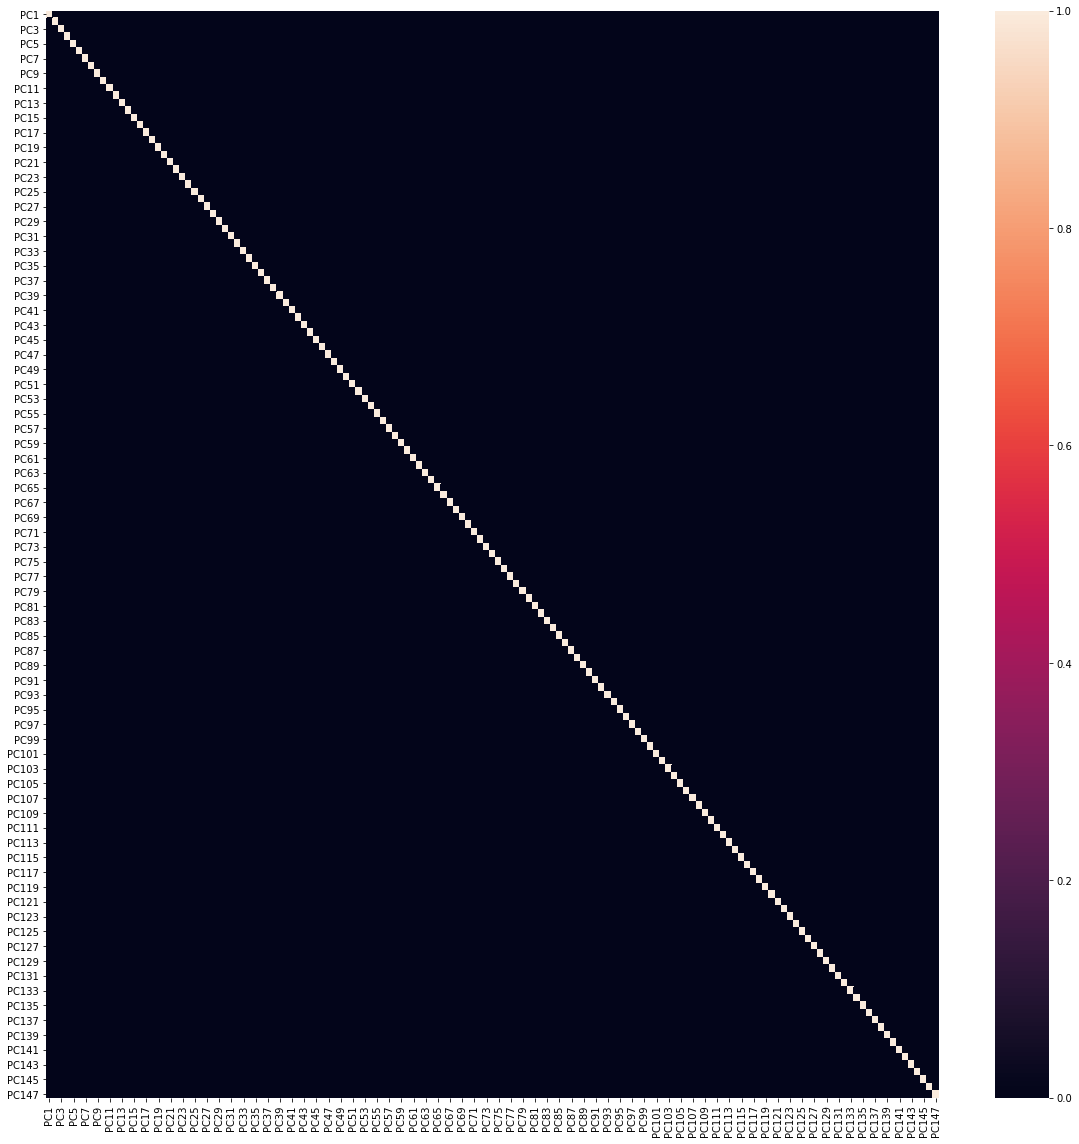

In [70]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_transformed.corr(),ax=ax)

Text(0, 0.5, 'Varianza Acumulada Explicada')

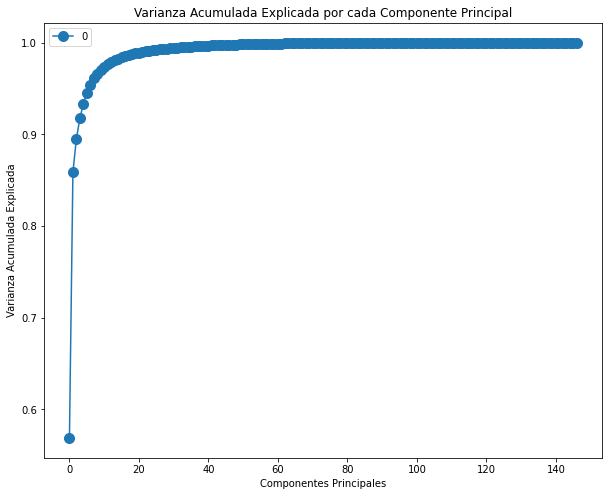

In [71]:
suma_acumulada = np.cumsum(pca_object.explained_variance_ratio_)

fig,ax = plt.subplots(figsize=(10,8))

pd.DataFrame(suma_acumulada).plot(
    ax=ax,
    marker='o',
    markersize=10
)

ax.set_title("Varianza Acumulada Explicada por cada Componente Principal")
ax.set_xlabel("Componentes Principales")
ax.set_ylabel("Varianza Acumulada Explicada")

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

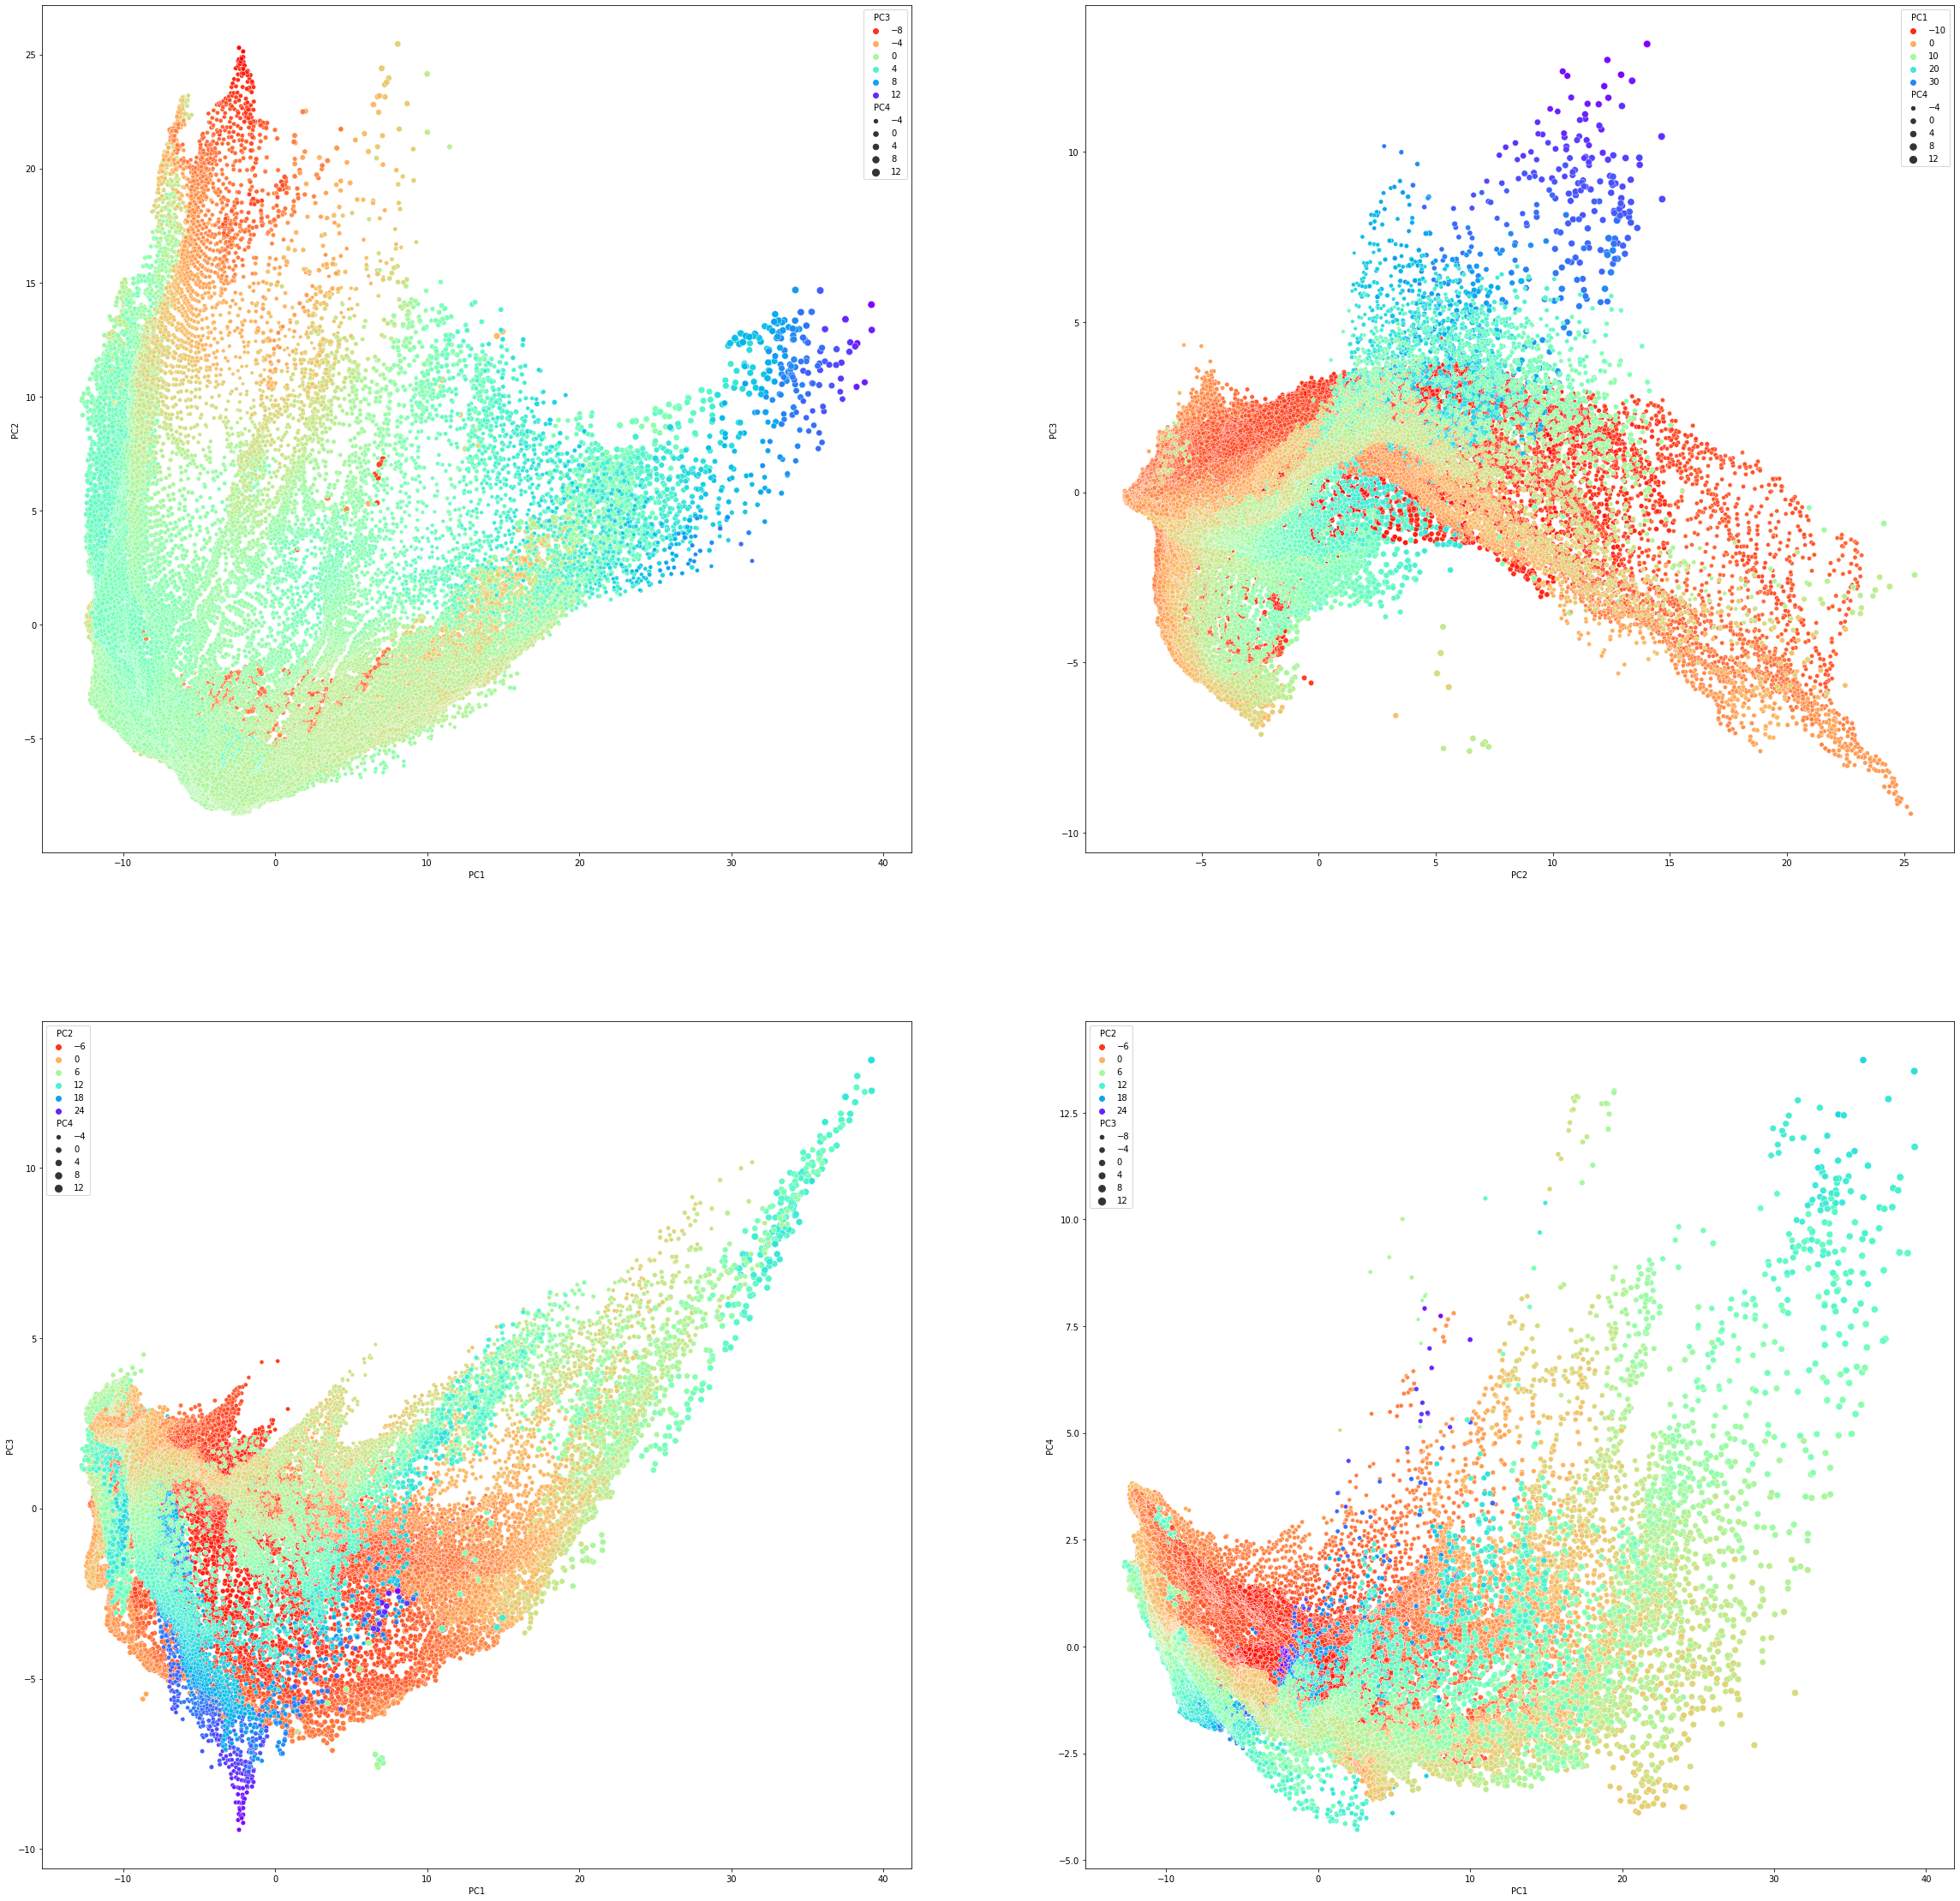

In [82]:
fig,axes = plt.subplots(figsize=(40,40),ncols=2,nrows=2)

sns.scatterplot(data=df_transformed,x='PC1',y='PC2',hue='PC3',size='PC4',palette='rainbow_r',ax=axes[0,0])
sns.scatterplot(data=df_transformed,x='PC1',y='PC3',hue='PC2',size='PC4',palette='rainbow_r',ax=axes[1,0])
sns.scatterplot(data=df_transformed,x='PC2',y='PC3',hue='PC1',size='PC4',palette='rainbow_r',ax=axes[0,1])
sns.scatterplot(data=df_transformed,x='PC1',y='PC4',hue='PC2',size='PC3',palette='rainbow_r',ax=axes[1,1])

In [85]:
from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters=8,init='k-means++')

In [88]:
df_transformed['cluster'] = kmodel.fit_predict(df_transformed)

<AxesSubplot:xlabel='PC1', ylabel='PC3'>

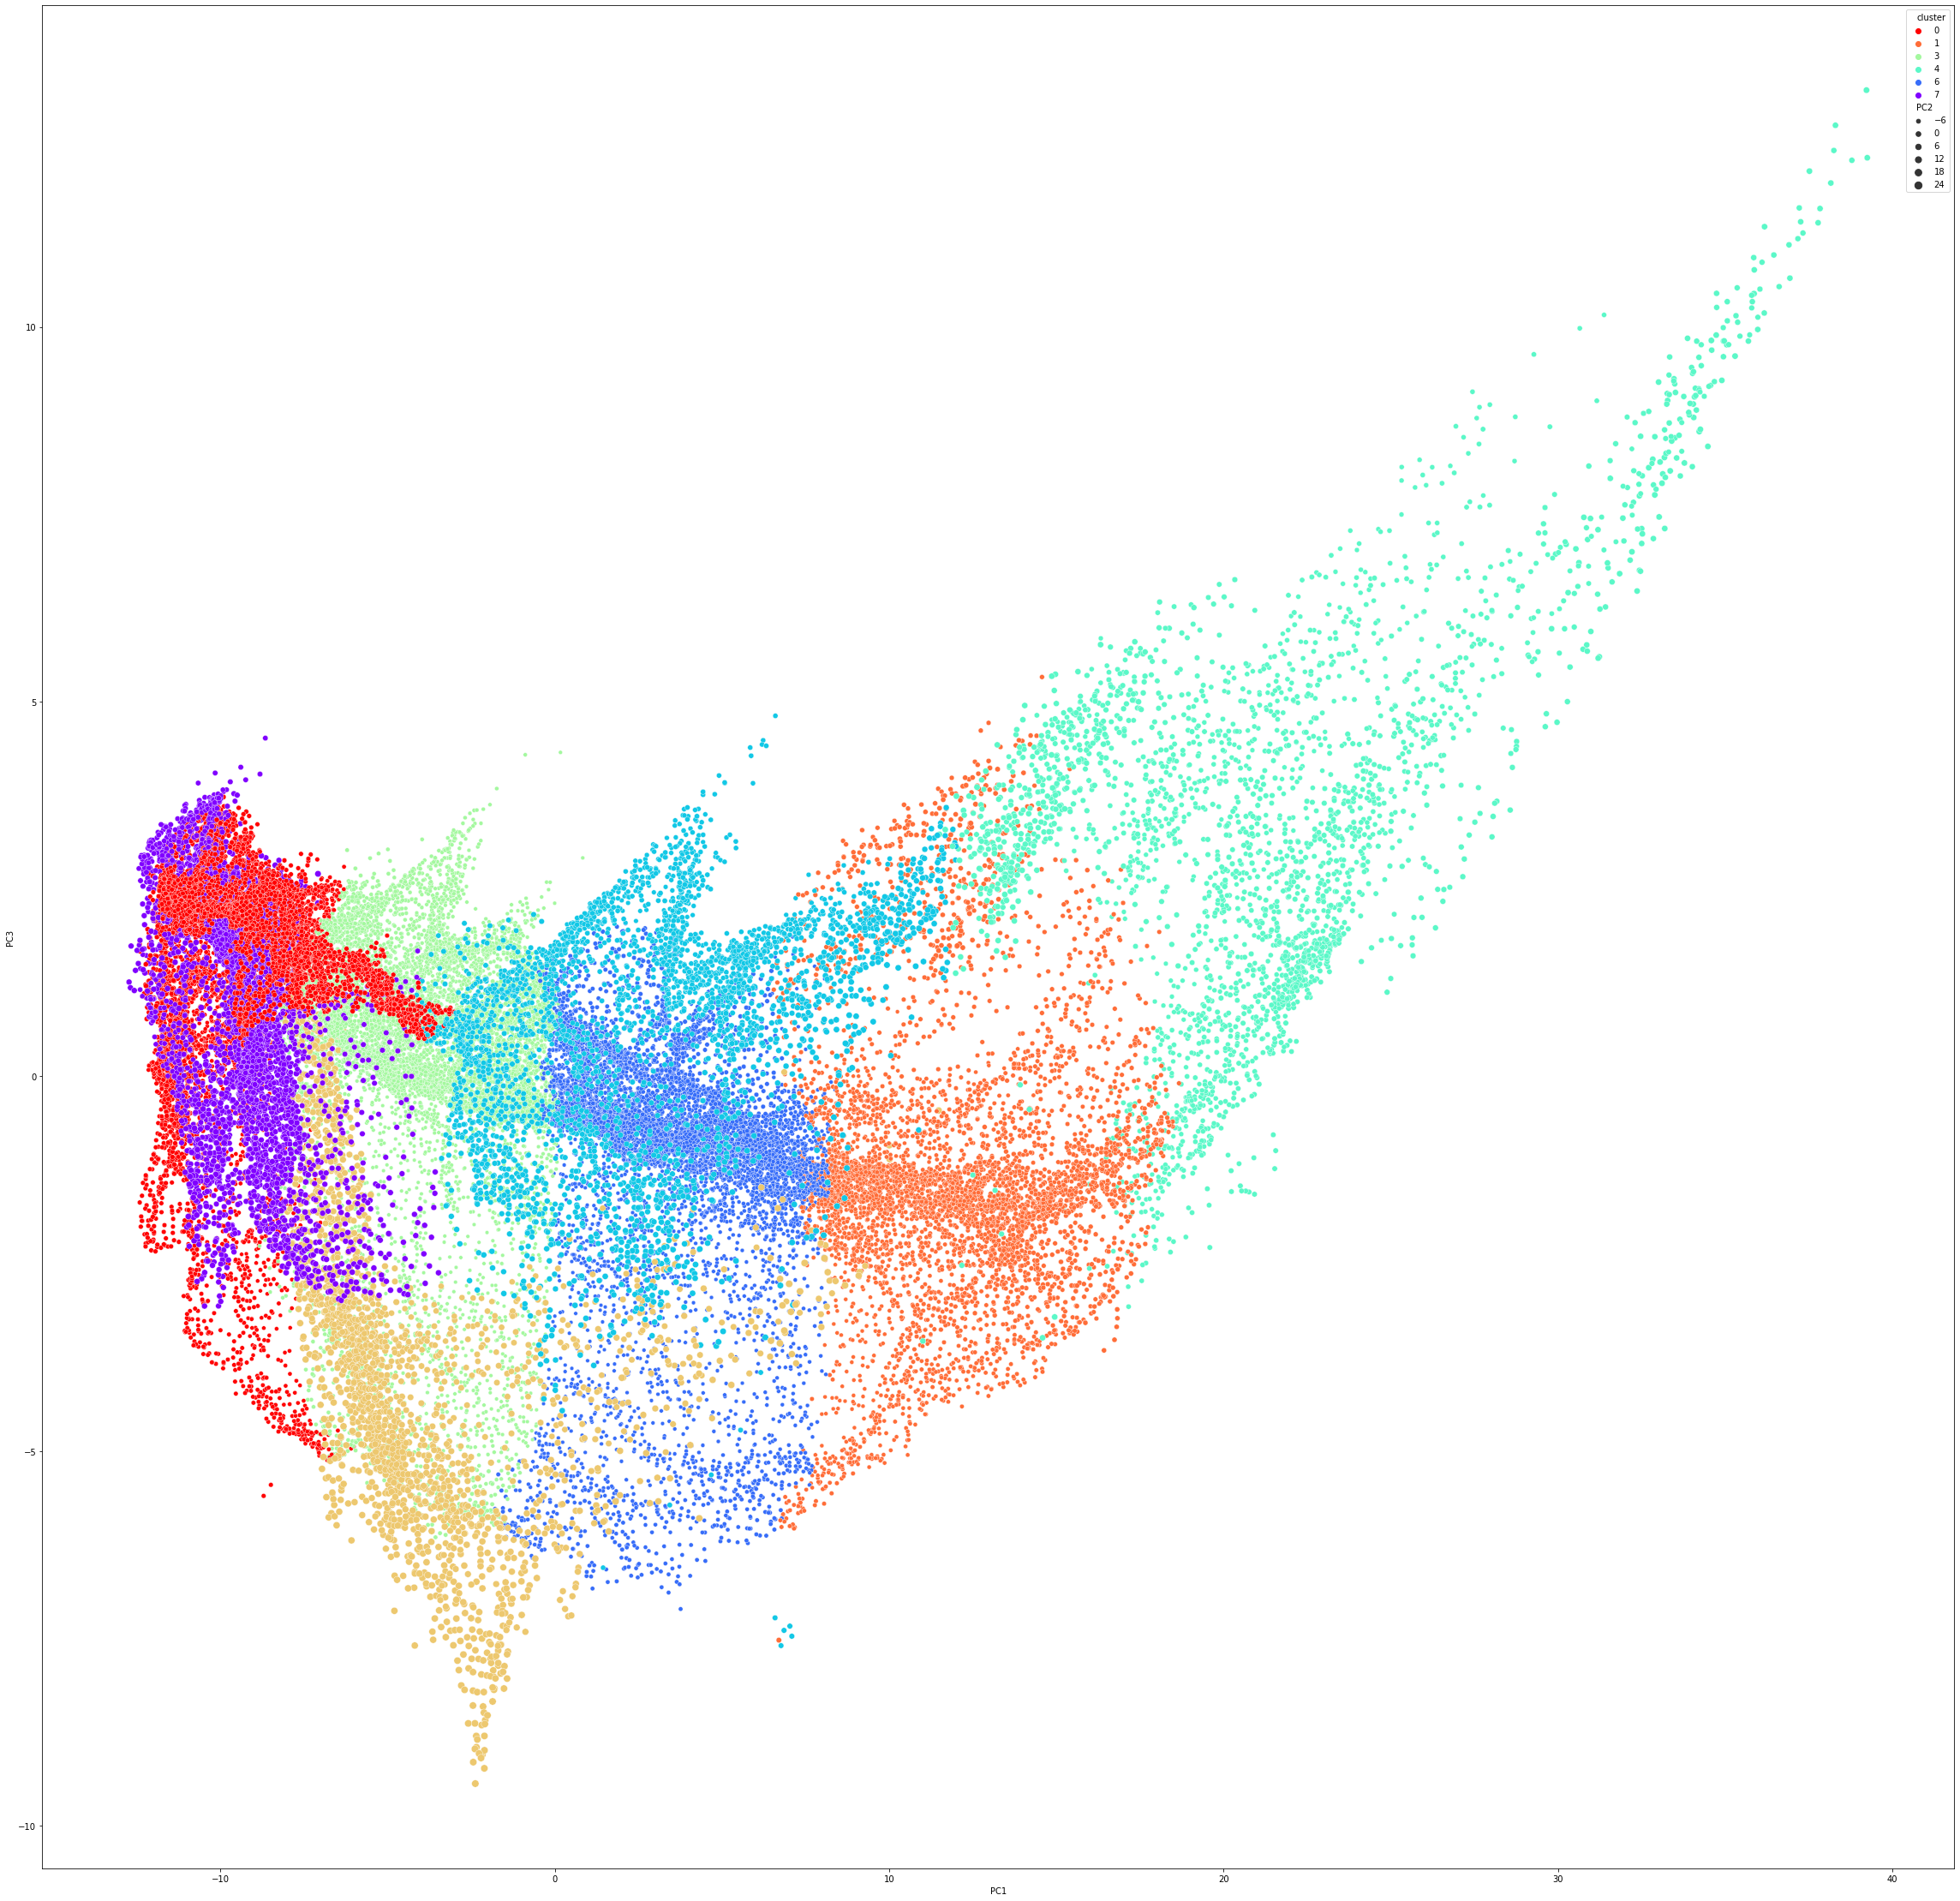

In [91]:
fig,ax = plt.subplots(figsize=(40,40))

sns.scatterplot(data=df_transformed,x='PC1',y='PC3',hue='cluster',size='PC2',palette='rainbow_r',ax=ax)

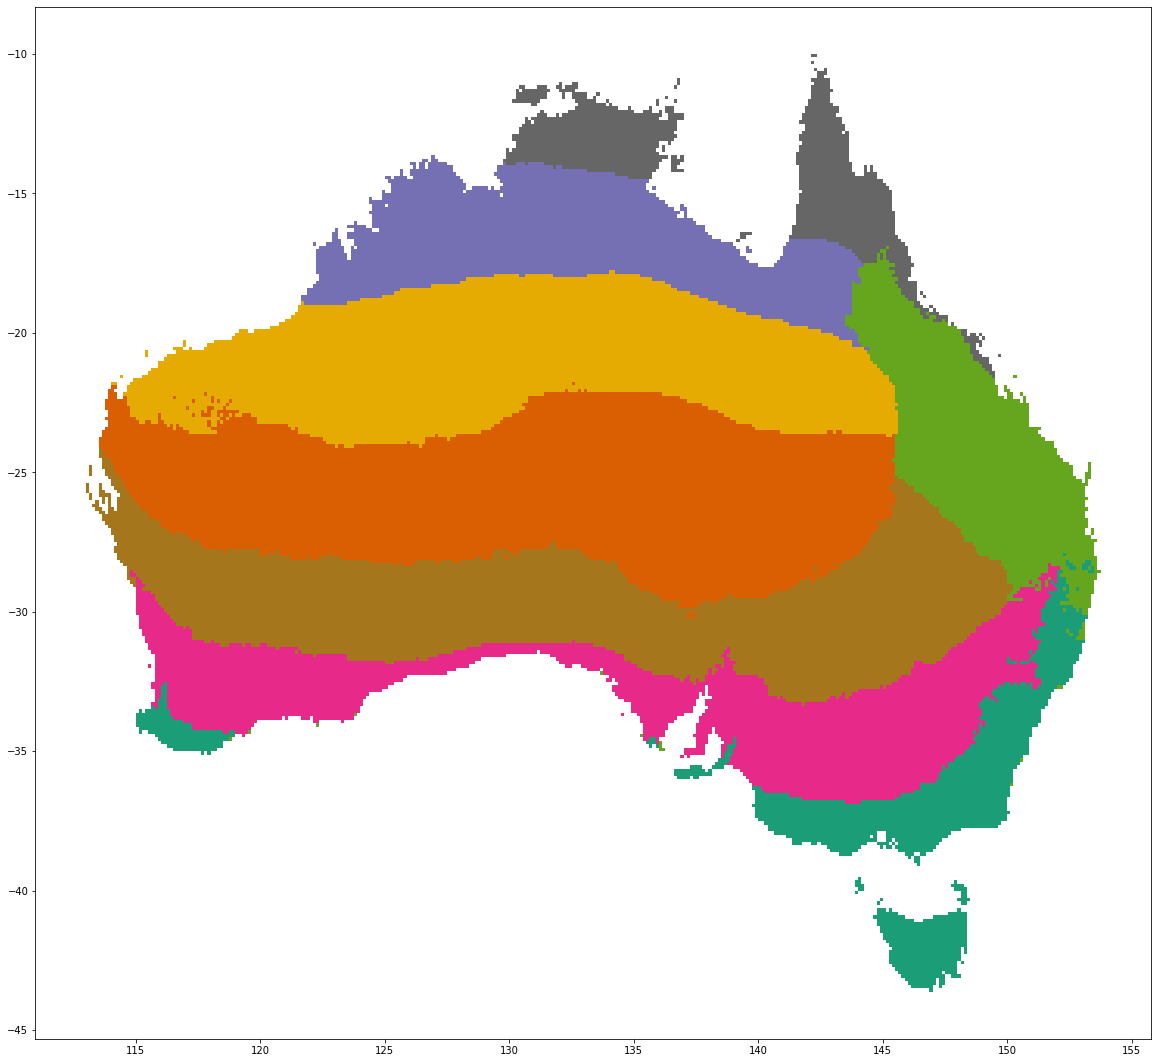

In [98]:
fig,ax = plt.subplots(figsize=(20,20))

kmodel = KMeans(n_clusters=8,init='k-means++')

gdf['cluster'] = kmodel.fit_predict(df_transformed)
gdf.plot(column='cluster',ax=ax,cmap='Dark2', legend=False);